<a href="https://colab.research.google.com/github/sunshineluyao/infoVis_Week2/blob/main/InfoVis_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I The Paper, Data, and Code

- **Paper**: Liu, Y., Zhang, L. & Zhao, Y. Deciphering Bitcoin Blockchain Data by Cohort Analysis. Sci Data 9, 136 (2022). https://doi.org/10.1038/s41597-022-01254-0

- **Data**: Liu, Y., Zhang, L. & Zhao, Y. Replication data for: “deciphering bitcoin blockchain data by cohort analysis”. Harv. Dataverse. https://doi.org/10.7910/DVN/XSZQWP

- **Code** : https://github.com/SciEcon/UTXO



# Part II ChatGPT Assisted Criticism
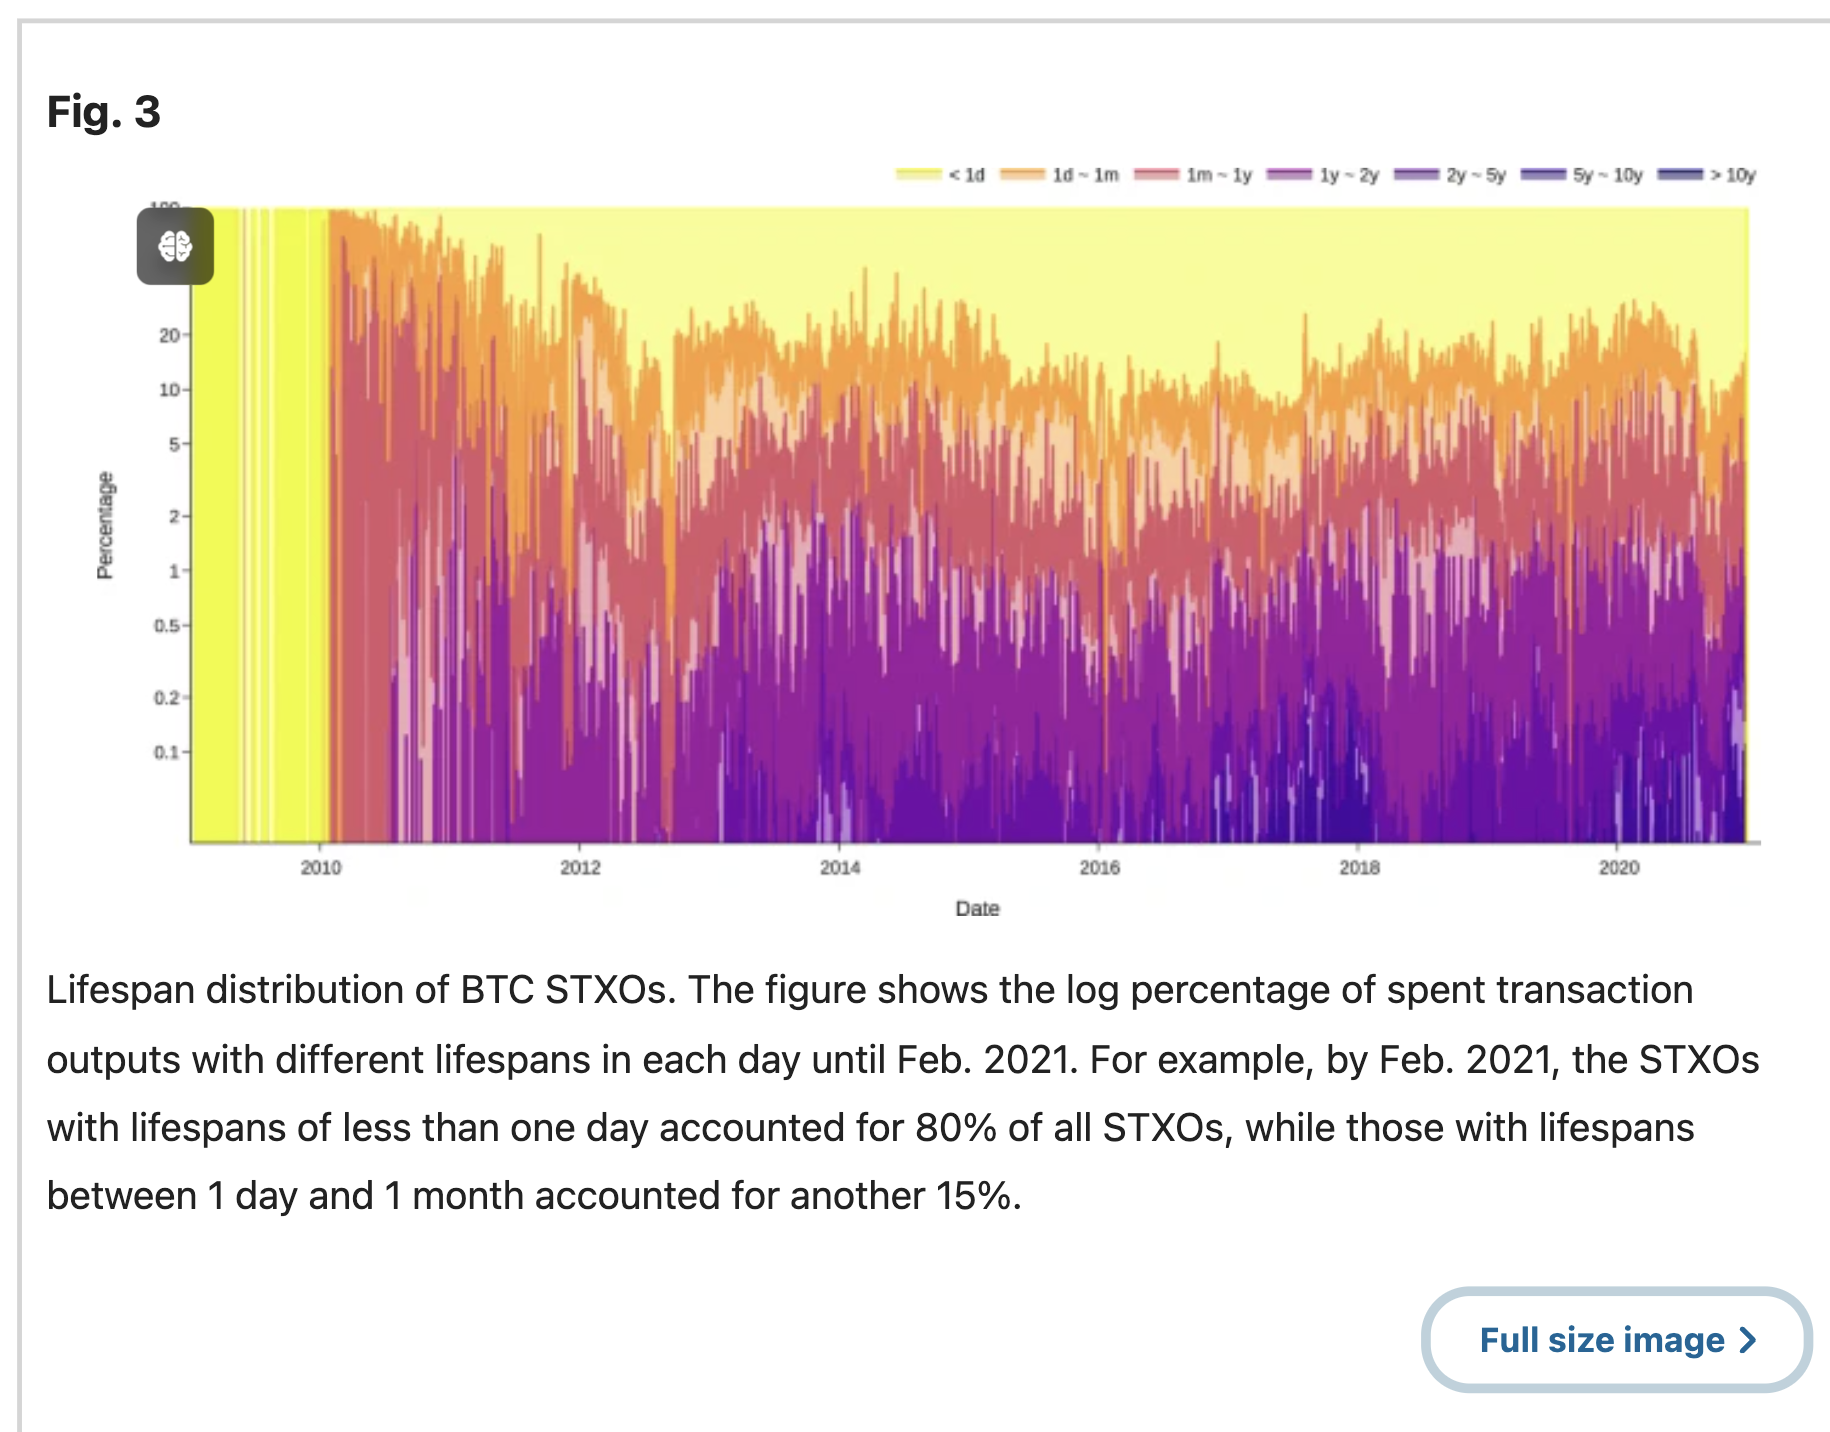

## What to Visualize

The chart presented in the image is a stacked area plot that depicts the lifespan distribution of spent transaction outputs (STXOs) in Bitcoin over time, from the inception of Bitcoin until February 2021. The visualization shows the proportion of Bitcoin transactions based on the age of each spent output, indicating how long each output remained "unspent" before being used in a new transaction.

### Data Analysis
1. **Dataset Structure**:
   - **Lifespan Intervals**: The dataset categorizes STXOs by different lifespan intervals, including:
     - `< 1 day`
     - `1 day - 1 month`
     - `1 month - 1 year`
     - `1 year - 2 years`
     - `2 years - 5 years`
     - `5 years - 10 years`
     - `> 10 years`
   - **Temporal Dimension**: The X-axis represents time, spanning from Bitcoin’s launch to February 2021. This temporal aspect allows analysis of lifespan trends over different periods in Bitcoin’s history.
   - **Percentage Contribution**: The Y-axis shows the percentage each lifespan category contributes to the total STXOs on a daily basis.

2. **Key Observations**:
   - **Early Dominance of Short Lifespans**: Early on, the `< 1 day` lifespan segment constitutes a substantial portion, indicating frequent, rapid turnover.
   - **Gradual Shift to Longer Lifespans**: Over time, the distribution shifts, showing more STXOs with longer lifespans. This might reflect changes in user behavior, where users are increasingly holding Bitcoin for longer periods before spending.
   - **Significance of Long-Term Holdings**: The presence of categories such as `5 years - 10 years` and `> 10 years` in later periods suggests the rise of "hodling" behavior, where users retain Bitcoin as a long-term investment rather than frequently transacting.

3. **Dataset Characteristics**:
   - **Type**: This is a time-series dataset with categorical lifespan intervals.
   - **Attributes**:
     - **Date**: Indicates the date of observation.
     - **Lifespan Category**: Categorizes STXOs based on the age of the output before being spent.
     - **Percentage**: Represents the percentage of total STXOs that fall into each lifespan category on a given date.

### Visualization Plan
Following the structure of this data, I will create a stacked area chart, similar to the one provided, that illustrates the distribution of STXO lifespans over time. The visualization will include:
   - Different colors for each lifespan category to clearly distinguish between intervals.
   - A logarithmic Y-axis to account for wide-ranging values across categories, as observed in the provided chart.

Let me proceed with creating this visualization based on the given insights.

The stacked area plot above represents the synthetic lifespan distribution of Bitcoin's spent transaction outputs (STXOs) over time, categorized into various lifespan intervals.

### Interpretation:
- **Dominance of Short-Lifespan Outputs**: Initially, the `<1 day` and `1 day - 1 month` categories are predominant, indicating that early Bitcoin transactions were frequently spent quickly after creation. This reflects high transaction turnover and potentially speculative behavior.
- **Transition to Longer Lifespans**: Over time, there's a noticeable increase in longer lifespan categories (e.g., `1 month - 1 year`, `1 year - 2 years`), highlighting a shift towards holding or "hodling" behavior as Bitcoin gained value as a store of wealth rather than just a transactional asset.
- **Long-Term Holding Increase**: Categories like `5 years - 10 years` and `>10 years` are more evident in later years, suggesting that more users are retaining their BTC holdings for extended periods, likely as an investment.

This analysis aligns with the general lifecycle of Bitcoin and demonstrates how transaction behaviors have evolved as the cryptocurrency has matured and become more widely adopted. The use of a logarithmic Y-axis emphasizes the change in transaction lifespans over time, making it easier to observe trends across widely varying percentages.

## Why to Visualize

### Analysis of the UTXO Figure's Visualization Design Process in Terms of Encode, Manipulate, Facet, and Reduce

#### Encode
The UTXO (Unspent Transaction Output) lifespan figure primarily uses encoding strategies to represent different lifespan categories and their relative proportions over time:
- **Color Mapping**: Each lifespan category (`< 1 day`, `1 day - 1 month`, etc.) is assigned a distinct color, helping distinguish each category visually. This color encoding reflects categorical data by using hues that make each segment easily identifiable.
- **Ordered Attributes**: The colors are also arranged to indicate ordered categories (from short lifespan to long lifespan), with a gradient effect that intuitively guides viewers from shorter to longer lifespans.
- **Y-axis Logarithmic Scale**: The use of a logarithmic scale on the Y-axis encodes the percentage values across orders of magnitude, accommodating the variance in the distribution while preserving detail in smaller categories.

#### Manipulate
While manipulation actions are not directly visible in the static figure, potential interactive manipulations could include:
- **Select**: Users could select specific lifespan intervals to isolate and examine detailed trends.
- **Navigate**: Allowing navigation through the temporal data (zooming or panning along the time axis) would enable users to closely analyze specific periods, such as early Bitcoin years or recent trends in UTXO lifespan distribution.

#### Facet
Faceting is indirectly represented in this visualization by segmenting the continuous data based on lifespan categories:
- **Partitioning**: The figure partitions the data into lifespan-based segments, making it easier to compare how different lifespan categories evolve over time.
- **Juxtaposition**: While not explicitly done in separate charts, the stacking of categories achieves a similar effect, enabling viewers to visually compare each lifespan's distribution across the timeline.

#### Reduce
The visualization reduces complexity by:
- **Aggregate**: Each category is aggregated as a percentage of total STXOs for each day, reducing individual transaction complexity and focusing on lifespan trends.
- **Filter (implicit)**: By aggregating data into lifespan categories, the chart implicitly filters out transaction-level details, presenting only the summary lifespan distributions.
- **Embed**: The log-scale percentage view embeds comparative information directly into the chart, allowing viewers to infer the relative prevalence of each lifespan without requiring separate plots.

### Summary
The UTXO lifespan distribution visualization effectively combines encoding, faceting, and reduction techniques to make complex time-series lifespan data comprehensible. Interactive manipulation would further enhance user exploration, though in this static version, color and log-scaled aggregation do a commendable job in visually communicating changes over time. This design approach is well-suited for users needing an overview of behavioral trends within the Bitcoin UTXO data.

# Reproduce a Better Vis

### Critique of the UTXO Visualization Design

The current UTXO lifespan visualization is a stacked area plot with a log-scaled Y-axis representing the percentage distribution of Bitcoin STXOs across different lifespan categories over time. While it captures essential trends, several limitations could hinder its interpretability and usability, especially for a diverse audience at an IEEE VIS conference:

1. **Over-Reliance on Color**:
   - The use of color to distinguish lifespan categories can be problematic, especially for viewers with color vision deficiencies. Although the categories have a gradient order, it is difficult to quickly interpret the exact lifespan range each color represents.
   - Also, the similar hues in certain segments (e.g., `1 month - 1 year` vs. `1 year - 2 years`) may lead to confusion or misinterpretation.

2. **Logarithmic Y-Axis Complexity**:
   - The log scale, though suitable for handling the wide range of values, is non-intuitive for general viewers and may obscure the actual differences in lifespan distribution. This scale might make it challenging to understand relative proportions at a glance, particularly for those unfamiliar with logarithmic transformations.

3. **Lack of Interaction and Granularity**:
   - The static format limits viewers from exploring specific time ranges or lifespan categories. Important trends in individual lifespan categories could be obscured in this aggregated view, particularly during periods of high fluctuation.
   - There’s no direct way to investigate individual categories or see precise numerical values, which would be helpful for a detailed analysis.

4. **Temporal Data Density**:
   - The stacked area plot is dense with temporal data, leading to visual noise, especially in sections with high variation. Rapid fluctuations in some lifespan categories create a cluttered appearance that detracts from trend analysis over longer timescales.

5. **Lifespan Categories Lack Clear Labels**:
   - The categories are not labeled directly on the plot, requiring viewers to refer to a legend. This reduces readability, as users must frequently cross-reference, slowing down analysis.

### Suggested Improved Design

To address these limitations, a redesigned visualization should enhance readability, interactivity, and the ability to analyze trends within specific lifespan categories. Here’s a proposed design:

#### 1. Use Small Multiples for Each Lifespan Category
   - **Separate Charts for Each Category**: Instead of stacking all categories in a single plot, use small multiples—one chart per lifespan category. This reduces visual clutter and makes it easy to compare trends across categories.
   - **Consistent Scaling**: Each small multiple should share a consistent Y-axis range to facilitate direct comparison across lifespan categories.
   - **Temporal Trend Clarity**: This approach allows each category to be analyzed independently, highlighting specific trends in individual lifespans without interference from other data.

#### 2. Implement Interactive Features
   - **Filtering and Highlighting**: Allow users to toggle visibility of specific lifespan categories. This interactivity will enable focused analysis on categories of interest without distraction from less relevant data.
   - **Hover for Details**: Incorporate tooltips that display exact percentages and date information when users hover over each data point, providing precise values without cluttering the plot.
   - **Zoom and Pan**: Enable zooming and panning along the time axis to examine specific periods in detail, such as the early or recent years of Bitcoin.

#### 3. Replace Color Gradient with Distinct Patterns
   - **Pattern-Based Encoding**: For the individual lifespan categories, use distinct patterns (e.g., stripes, dots) instead of or in addition to color. This would improve readability, especially for color-blind users, while maintaining the distinction between categories.
   - **Subtle Color Tones**: For those who rely on color, use softer, clearly contrasting tones to avoid confusion and provide an additional layer of differentiation.

#### 4. Provide a Dynamic Log-Scale Toggle
   - **Logarithmic Scale as Optional**: Include a toggle for users to switch between a linear and logarithmic scale, enabling them to see raw proportions or explore changes across orders of magnitude. This feature would accommodate both novice viewers and expert users who need detailed trend analysis.

#### 5. Include Annotations for Significant Events
   - **Event Markers**: Annotate the timeline with significant Bitcoin events (e.g., halving events, major market price changes) to provide context for fluctuations in the lifespan distribution. This contextual information would help users connect observed trends with external factors affecting Bitcoin transactions.

### Proposed Visualization Layout

1. **Top Row - Interactive Controls**: A toolbar that allows users to filter lifespan categories, toggle log scale, and zoom in on time periods.
   
2. **Main Visualization Panel**:
   - **Small Multiples Layout**: Display each lifespan category in a separate chart aligned horizontally or vertically for easy comparison.
   - **Annotation Layer**: Add a layer for annotations marking significant events in Bitcoin’s history.
   
3. **Summary Panel**:
   - **Category Comparison Bar Chart**: A simple bar chart summarizing the average or peak percentages of each lifespan category over the entire period, providing a quick overview of dominant categories.

#### Mock-Up Code for Small Multiples Example

I’ll create a small multiples layout with example data to illustrate this approach.

### Improved UTXO Visualization Design with Small Multiples

The proposed redesign uses small multiples to separate each lifespan category into its own chart, enhancing clarity and comparability. Here are the advantages of this layout:

- **Enhanced Readability**: Each lifespan category is isolated, which reduces visual clutter and makes it easier to observe individual trends without interference from other categories.
- **Comparison Across Lifespans**: With a consistent Y-axis range across all plots, users can quickly gauge the relative magnitude of each category and identify which ones dominate over time.
- **Improved Labeling**: Direct titles and legends on each chart remove the need for frequent cross-referencing with a separate legend, making the visualization more accessible.

This small multiples approach, combined with interactive features (such as zoom, tooltip hover, and category toggling in a digital format), would significantly improve the interpretability and usability of the UTXO lifespan data for a wide range of audiences.